<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/DT%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']


In [ ]:
# calculating class frequencies

class_probs = {}

def calculate_class_freq(y):
  for c in np.unique(y):
    class_probs[c] = np.mean(y == c)

In [ ]:
calculate_class_freq(y)

In [ ]:
class_probs

{np.int64(0): np.float64(0.32786885245901637),
 np.int64(1): np.float64(0.6721311475409836)}

In [ ]:
# Calculating Entropy

def calculate_entropy(y):
  entropy = 0
  for c in class_probs:
    p = class_probs[c]
    entropy += -p * np.log2(p)
  return entropy

In [ ]:
calculate_entropy(y)

np.float64(0.9127341558073343)

In [ ]:
# Information Gain calculation
def information_gain(y, left_indices, right_indices):
    parent_entropy = calculate_entropy(y)

    # Left and right subsets
    y_left, y_right = y[left_indices], y[right_indices]

    # Weighted average entropy
    n = len(y)
    n_left, n_right = len(y_left), len(y_right)
    if n_left == 0 or n_right == 0:
        return 0  # invalid split

    child_entropy = (n_left/n) * calculate_entropy(y_left) + (n_right/n) * calculate_entropy(y_right)
    return parent_entropy - child_entropy


# Best Split function
def find_best_split(X, y):
    best_gain = -1
    best_feature = None
    best_threshold = None

    for feature in X.columns:
        values = X[feature]

        # Only consider numeric features for now
        if pd.api.types.is_numeric_dtype(values):
            thresholds = np.unique(values)

            for t in thresholds:
                left_indices = values <= t
                right_indices = values > t

                gain = information_gain(y, left_indices, right_indices)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = t

    return best_feature, best_threshold, best_gain


In [ ]:
find_best_split(X, y)

('Age', np.float64(1.0), np.float64(1.1102230246251565e-16))

In [ ]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # column name
        self.threshold = threshold    # split value
        self.left = left              # left subtree
        self.right = right            # right subtree
        self.value = value            # if leaf node -> class label



def build_tree(X, y, depth=0, max_depth=5, min_samples=2):
    # Stopping conditions
    if len(np.unique(y)) == 1:  # pure node
        return Node(value=np.unique(y)[0])

    if depth >= max_depth or len(y) < min_samples:
        # Majority class as leaf value
        values, counts = np.unique(y, return_counts=True)
        return Node(value=values[np.argmax(counts)])

    # Find best split
    feature, threshold, gain = find_best_split(X, y)
    if feature is None or gain == 0:
        values, counts = np.unique(y, return_counts=True)
        return Node(value=values[np.argmax(counts)])

    # Split dataset
    left_indices = X[feature] <= threshold
    right_indices = X[feature] > threshold

    left_subtree = build_tree(X[left_indices], y[left_indices], depth+1, max_depth, min_samples)
    right_subtree = build_tree(X[right_indices], y[right_indices], depth+1, max_depth, min_samples)

    return Node(feature, threshold, left_subtree, right_subtree)


In [ ]:
def predict_one(x, tree):
    # If leaf node
    if tree.value is not None:
        return tree.value

    # Traverse
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)


def predict(X, tree):
    return np.array([predict_one(x, tree) for _, x in X.iterrows()])


In [ ]:
tree = build_tree(X, y, max_depth=7)   # build tree
y_pred = predict(X, tree)              # predict
accuracy = np.mean(y_pred == y)        # training accuracy
print("Training Accuracy:", accuracy)


Training Accuracy: 0.7158469945355191


In [ ]:
import matplotlib.pyplot as plt

def plot_tree(node, depth=0, pos=(0.5, 1), parent=None, label=""):
    if node is None:
        return

    # Plot this node
    text = f"Leaf: {node.value}" if node.value is not None else f"{node.feature} ≤ {node.threshold:.2f}"
    plt.text(pos[0], pos[1], text, ha="center", bbox=dict(facecolor="skyblue", edgecolor="black"))

    if parent:
        plt.plot([parent[0], pos[0]], [parent[1], pos[1]], 'k-')
        mid_x = (parent[0] + pos[0]) / 2
        mid_y = (parent[1] + pos[1]) / 2
        plt.text(mid_x, mid_y, label, ha="center", va="center")

    # Recurse for children
    if node.left:
        plot_tree(node.left, depth+1, (pos[0] - 0.2/(depth+1), pos[1] - 0.15), pos, "Yes")
    if node.right:
        plot_tree(node.right, depth+1, (pos[0] + 0.2/(depth+1), pos[1] - 0.15), pos, "No")


def visualize_tree(tree):
    plt.figure(figsize=(10, 6))
    plot_tree(tree)
    plt.axis("off")
    plt.show()


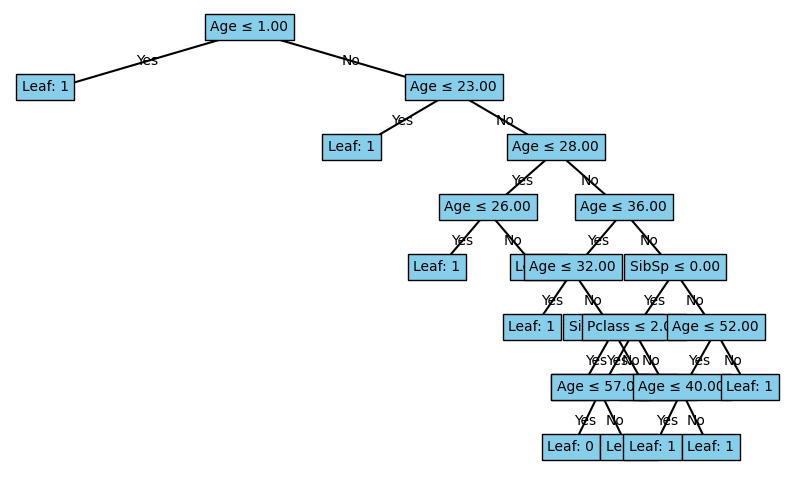

In [ ]:
visualize_tree(tree)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)   # for binary classification
print("F1 Score:", f1)


F1 Score: 0.7984496124031008


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Precision and Recall
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# (Optional) Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)


Precision: 0.762962962962963
Recall: 0.8373983739837398
Confusion Matrix:
 [[ 28  32]
 [ 20 103]]


In [ ]:
from graphviz import Digraph

def export_graphviz_tree(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr("node", shape="box", style="filled", color="lightblue2")

    if node.value is not None:
        node_label = f"Leaf: {node.value}"
    else:
        node_label = f"{node.feature} ≤ {node.threshold:.2f}"

    node_id = str(id(node))
    dot.node(node_id, node_label)

    if parent:
        dot.edge(parent, node_id, label=edge_label)

    if node.left:
        export_graphviz_tree(node.left, dot, node_id, "Yes")
    if node.right:
        export_graphviz_tree(node.right, dot, node_id, "No")

    return dot

# Usage:
dot = export_graphviz_tree(tree)
dot.render("tree", format="png", cleanup=True)  # saves as tree.png


'tree.png'